<a href="https://colab.research.google.com/github/aaho0084/Pytorch-Neural-Network-Creation/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F #help data move forward in nn


In [ ]:
#Create a Model Class that inherits nn.Module

class Model(nn.Module):
  #Input layer (4 features of the flower) -- >
  #Hidden Layer1 --->
  #H2 ----> output

  def __init__(self, in_features = 4, h1 = 7 , h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x






In [ ]:
#manual seed for randomization
torch.manual_seed(43)
#Create instance of of model
model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

my_df = pd.read_csv(url)

my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#Setting output as integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)


/tmp/ipython-input-3292224012.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


In [ ]:
#Train Test Split
X = my_df.drop('species',axis = 1)
y = my_df['species']

In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Try getting rid of random_state
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.19,
                                                   random_state = 41)


In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
print(y_train.dtype)

float64


In [ ]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [ ]:
# Set the criterion of model to measure the error.

criterion = nn.CrossEntropyLoss()

#Choose Optimizer, lr = learning rate (After error doesn't go down, lower learning rate)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
# Train our model
# Epochs (one run thru all the training data in our network)
epochs = 100 #100 runs
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) #predicted results

  #Measure the loss/error, gonna be high at first

  loss = criterion(y_pred, y_train) #Subtraction of NN between prediction and result

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss : {loss}')

    #Do some back propataion: take the error rate of forward of propagation
    #feed it back to tweak its weight
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss : 1.0884548425674438
Epoch: 10 and loss : 0.9798420667648315
Epoch: 20 and loss : 0.8196139931678772
Epoch: 30 and loss : 0.6726488471031189
Epoch: 40 and loss : 0.5462900400161743
Epoch: 50 and loss : 0.3940958082675934
Epoch: 60 and loss : 0.22415944933891296
Epoch: 70 and loss : 0.10984398424625397
Epoch: 80 and loss : 0.06341110914945602
Epoch: 90 and loss : 0.04497917369008064


Text(0.5, 0, 'number of trials')

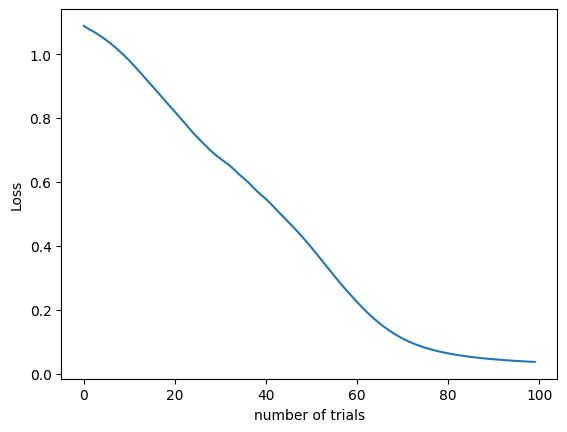

In [ ]:
#Graph it out!
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('number of trials')

In [ ]:
#Evaluate Model on Test Data_Set (turn off back propagation)

with torch.no_grad():
  y_eval = model.forward(X_test) #X_test are features from our test_set,
  #y_eval is prediction
  loss =criterion(y_eval, y_test) # Find the loss or error

In [ ]:
loss

tensor(0.1528)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}. {str(y_val)} \t {y_test[i]}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'we got {correct} out of {len(y_test)} correct')


1. tensor([-8.5361,  4.7335,  8.8282]) 	 2
2. tensor([-11.9972,   4.3257,  13.0319]) 	 2
3. tensor([-11.9963,   5.5051,  12.7264]) 	 2
4. tensor([-3.0209,  6.5865,  1.8050]) 	 1
5. tensor([-9.7810,  5.3045, 10.1497]) 	 2
6. tensor([-0.4470,  6.6746, -1.2075]) 	 1
7. tensor([-7.0109,  5.4744,  6.8222]) 	 2
8. tensor([-2.3624,  6.7660,  0.9732]) 	 1
9. tensor([-8.2936,  5.4260,  8.3539]) 	 2
10. tensor([-12.4717,   4.6984,  13.4960]) 	 2
11. tensor([-6.6115,  5.5551,  6.3263]) 	 2
12. tensor([  9.5337,   3.4372, -10.8397]) 	 0
13. tensor([ 8.6885,  3.0069, -9.8439]) 	 0
14. tensor([ 0.7409,  5.5864, -2.3384]) 	 1
15. tensor([  8.9007,   3.7406, -10.3251]) 	 0
16. tensor([-6.5648,  5.7933,  6.2148]) 	 2
17. tensor([  9.0088,   3.4091, -10.3096]) 	 0
18. tensor([-8.0741,  5.0688,  8.1909]) 	 1
19. tensor([  9.2904,   3.3133, -10.5530]) 	 0
20. tensor([ 7.9988,  3.0890, -9.1914]) 	 0
21. tensor([ 0.0318,  6.1152, -1.6360]) 	 1
22. tensor([-11.0191,   5.1193,  11.6638]) 	 2
23. tensor([  9.0

In [ ]:
new_iris = torch.tensor([4.7,3.2,1.3,0.5])

In [ ]:
with torch.no_grad():
  print(model(new_iris))
  print(model(new_iris).argmax().item())

tensor([  8.9336,   3.1357, -10.1341])
0


In [ ]:
new_iris_2 = torch.tensor([6.7,3.0,5.2,2.3])
with torch.no_grad():
  print(model(new_iris_2))
  print(model(new_iris_2).argmax().item())

tensor([-9.1308,  5.2552,  9.3875])
2


In [ ]:
torch.save(model.state_dict(), 'My First NN: Iris dataset for beginners')


In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('My First NN: Iris dataset for beginners'))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
with torch.no_grad():
  print(new_model(new_iris_2))

tensor([-9.1308,  5.2552,  9.3875])
